#**Institución Universitaria Pascual Bravo**
#Curso: Reconocimiento de patrones 2024-1

#Docente: Juan Carlos Briñez de León
#Algoritmo clásico LBP para reconocimiento facial

In [ ]:
#Conectando el drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Mostrando imagen completa


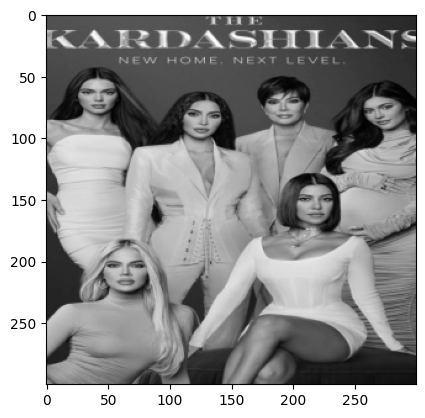

 
Mostrando recorte del rostro
Mostrando recorte del rostro
Mostrando recorte del rostro
Mostrando recorte del rostro
Mostrando recorte del rostro
Mostrando recorte del rostro


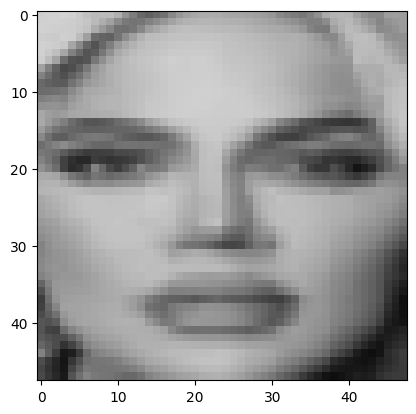

In [ ]:
#Cargando una imagen de prueba.
import cv2 # OpenCV para computer vision
import numpy as np
import matplotlib.pyplot as plt #Para graficar

#Cargando datos rostros Pascual
Ruta_dataset = '/content/drive/MyDrive/Semestre 8/ReconocimientoDePatrones/Semana 9/Face recognition/train_test' #Cata
#Ruta_dataset = '/content/drive/MyDrive/Semestre 8/ReconocimientoDePatrones/Semana 9/Face recognition/train_test' #Gerson
Filas = 300
Columnas = 300

#Target=15  #Es el nombre de la foto, es "15.jpg"

#Ruta=Ruta_dataset + '/' + str(Target+1) + '.jpg'
Ruta=Ruta_dataset + '/15.jpg'
img=cv2.imread(Ruta)
I_gris=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
I_gris=cv2.resize(I_gris, (Filas,Columnas), interpolation = cv2.INTER_AREA)

print('Mostrando imagen completa')
plt.imshow(I_gris.astype('uint8'),cmap='gray',vmin=0, vmax=255)
plt.show()
print(" ")

#Recortando región de rostro con Haar Cascade
Detector = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
Cara = Detector.detectMultiScale(I_gris, scaleFactor=1.1, minNeighbors=5, minSize=(20,20), maxSize=(300,300))
Tamaño_Roi = int(48)
Filas_2 = Tamaño_Roi
Columnas_2 = Tamaño_Roi

Particiones = Filas_2/4

for (x,y,w,h) in Cara:
    Recorte = I_gris[y:y+h,x:x+w]
    Recorte = cv2.resize(Recorte, (Filas_2,Columnas_2), interpolation = cv2.INTER_AREA)
    print('Mostrando recorte del rostro')
    plt.imshow(Recorte.astype('uint8'),cmap='gray',vmin=0, vmax=255)
    plt.show

del Cara

Corriendo todo el proceso de extracción de características LBP

In [ ]:
#Cargando el vector decodificador LBP
import pandas as pd
LBP_Codes = pd.read_excel(r'/content/drive/MyDrive/Semestre 8/ReconocimientoDePatrones/Semana 9/LBP_Codes.xlsx')
LBP_Codes = np.array(LBP_Codes)

# Función LBP
def LBP_Brinez(Img_gris,LBP_Codes):

  [Fl, Cl] = Img_gris.shape #Almacena el número de filas y Columnas
  Matriz_LBP = np.zeros((Fl,Cl))
  Pesos = np.array([[1,2,4],[128,0,8],[64,32,16]])

  for j in range(1, Cl-1, 1):#Columnas
    for i in range(1, Fl-1, 1):#Filas
      Region = Img_gris[i-1:i+2,j-1:j+2]
      Referencia = Img_gris[i,j]
      Region_Bin = Region >= Referencia
      Escalada = Region_Bin*Pesos
      Suma = np.sum(Escalada)
      Codigo = LBP_Codes[Suma,1]
      Matriz_LBP[i,j] = Codigo

  LBP_Histograna = np.histogram(Matriz_LBP, bins=59, range=(0, 58))
  LBP_Histograna = LBP_Histograna[0]
  LBP_Vector = np.zeros((1,len(LBP_Histograna)))
  for i in range(len(LBP_Histograna)):
    LBP_Vector[0,i] = LBP_Histograna[i]
  return (Matriz_LBP,LBP_Vector)

In [ ]:
# Aplicando el proceso a todas las imágenes (Tomando regiones de los rostros)
Matriz_Características = np.zeros((35,59*16+1)) #35=num de fotos,59=caracteristicas por cada imagen, 16 vectores LBP(son las subdivisiones de una imagen) y las etiquetas

for i in range(1,36,1):
  Ruta=Ruta_dataset + '/' + str(i) + '.jpg'
  img=cv2.imread(Ruta)
  I_gris=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  I_gris=cv2.resize(I_gris, (Filas,Columnas), interpolation = cv2.INTER_AREA)

  Cara = Detector.detectMultiScale(I_gris, scaleFactor=1.1, minNeighbors=10, minSize=(20,20), maxSize=(300,300))

  for (x,y,w,h) in Cara:
    Recorte=I_gris[y:y+h,x:x+w]

  del Cara

  Recorte=cv2.resize(Recorte, (Filas_2,Columnas_2))
  Contador = 0
  for j in range(0,4):
    for k in range(0,4):
      Matriz_LBP,Matriz_Características[i-1,Contador*59:(Contador*59+59)] = LBP_Brinez(Recorte[j*12:(j*12+12),k*12:(k*12 + 12)],LBP_Codes)

      Contador+=1

  if i>=1 and i<=5: #Las 5 primeras personas son la persona 1
    Matriz_Características[i-1,59*16] = 1
  else:
    if i>=6 and i<=10: # las 5 siguientes son la persona 2 ... etc
      Matriz_Características[i-1,59*16]=2
    else:
      if i>=11 and i<=15:
        Matriz_Características[i-1,59*16]=3
      else:
        if i>=16 and i<=20:
          Matriz_Características[i-1,59*16]=4
        else:
          if i>=21 and i<=25:
            Matriz_Características[i-1,59*16]=5
          else:
            if i>=26 and i<=30:
              Matriz_Características[i-1,59*16]=6
            else:
                Matriz_Características[i-1,59*16]=7

print(Matriz_Características.shape)

(35, 945)


In [ ]:
#Dividing dataset into input (X) and output (Y) variables
X = Matriz_Características[:,0:59*16]
Y = Matriz_Características[:,59*16] #Las etiquetas?

#Dividiendo el conjunto de imágenes
from sklearn.model_selection import StratifiedShuffleSplit
Indices = StratifiedShuffleSplit(n_splits=1, test_size=0.4, random_state=14541)
for train_index, test_index in Indices.split(X, Y):
    X_train, X_test = X[train_index,:], X[test_index,:]
    Y_train, Y_test = Y[train_index], Y[test_index]

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(21, 944) (21,)
(14, 944) (14,)


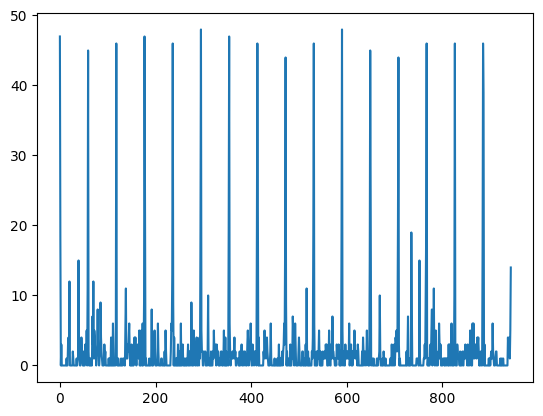

2304.0


In [ ]:
#Graficando características de un rostro
import matplotlib.pyplot as plt
x = np.zeros((1,59*16))
x[0,:] = np.arange(0,59*16,1)
plt.plot(x[0,:],X_train[6,:])
plt.show()

print(X_train[6,:].sum())

=========================================================================

In [ ]:
# Data normalization
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

===================================================================

Entrenamiento del modelo finalizado
 
Mostrando métricas globales individuales: 
Accuracy KNN 1.0
Precision KNN 1.0
Recall KNN 1.0
F1_Score KNN 1.0
 
Reporte de Clasificación:
               precision    recall  f1-score   support

         1.0       1.00      1.00      1.00         2
         2.0       1.00      1.00      1.00         2
         3.0       1.00      1.00      1.00         2
         4.0       1.00      1.00      1.00         2
         5.0       1.00      1.00      1.00         2
         6.0       1.00      1.00      1.00         2
         7.0       1.00      1.00      1.00         2

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14

 


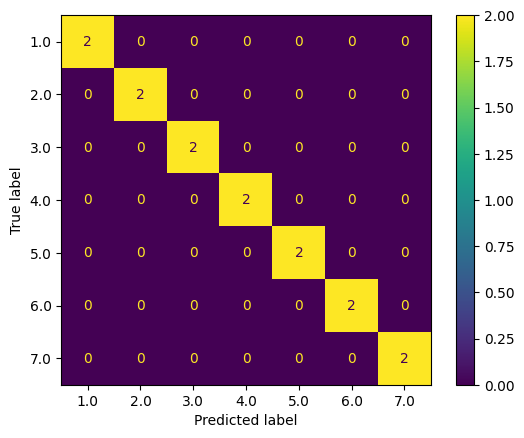

In [ ]:
#Evaluando casos mediante todos los clasificadores
from sklearn.neighbors import KNeighborsClassifier
Modelo_0 = KNeighborsClassifier(3)
Modelo_0.fit(X_train, Y_train)
Y_pred_0 =Modelo_0.predict (X_test)
print('Entrenamiento del modelo finalizado')
print(" ")

from sklearn.metrics import confusion_matrix as CM,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score as ACC
from sklearn.metrics import precision_score as PR
from sklearn.metrics import recall_score as RC
from sklearn.metrics import f1_score as F1
from sklearn.metrics import classification_report

print('Mostrando métricas globales individuales: ')
print("Accuracy KNN",ACC(Y_test, Y_pred_0))
print("Precision KNN",PR(Y_test, Y_pred_0, average='macro'))
print("Recall KNN",RC(Y_test, Y_pred_0, average='macro'))
print("F1_Score KNN",F1(Y_test, Y_pred_0, average='macro'))
print(' ')

report = classification_report(Y_test, Y_pred_0)
print("Reporte de Clasificación:\n", report)
print(' ')

Matriz = CM(Y_test, Y_pred_0, labels = Modelo_0.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=Matriz,display_labels  =Modelo_0.classes_)
disp.plot()

In [ ]:
#Guardando el modelo
import joblib
joblib.dump(Modelo_0, '/content/drive/MyDrive/Cursos IUPB 2024-1/Reconocimiento de patrones/Material de clase/Semana 9/Face recognition/Modelo_faces_KNN.pkl') # Guardo el modelo.

['/content/drive/MyDrive/Cursos IUPB 2024-1/Reconocimiento de patrones/Material de clase/Semana 9/Face recognition/Modelo_faces_KNN.pkl']

Validando resultados en otro Notebook